In [139]:
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

##### Regression Models 

**Variables/Columns**

- `Age` - years
- `5K etc. Duration` - seconds
- `Height` - inches
- `M/F` - Male or Female


### Read the csv file into a pandas DataFrame

In [140]:
boston2016 = pd.read_csv('marathon/boston_marathon_results_2016.csv')
#boston2016.head()
#boston2016.shape
boston2016.columns

Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen',
       '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace',
       'Proj Time', 'Official Time', 'Overall', 'Gender', 'Division'],
      dtype='object')

### Use Pandas get_dummies to convert categorical data

In [120]:
# convert male/female to 0/1s

boston2016_mf=pd.get_dummies(boston2016['M/F'])

# join the two dataframes

boston2016_join=pd.concat([boston2016, boston2016_mf], axis=1) 

boston2016_join.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,10K,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,F,M
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,0:15:47,0:31:20,...,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1,0,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,0:15:47,0:31:21,...,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2,0,1
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,0:15:46,0:31:20,...,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3,0,1
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,0:15:46,0:31:21,...,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4,0,1
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,0:15:46,0:31:21,...,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5,0,1


In [121]:
# Convert HH:MM:SS to total seconds

def time_convert(x):
    if x == "-":
        return None
    else:
        times = x.split(':')
        return (60*int(times[0])+60*int(times[1]))+int(times[2])


boston2016_join['5K Duration'] = boston2016_join['5K'].apply(time_convert)
boston2016_join['10K Duration'] = boston2016_join['10K'].apply(time_convert)
boston2016_join['15K Duration'] = boston2016_join['15K'].apply(time_convert)
boston2016_join['20K Duration'] = boston2016_join['20K'].apply(time_convert)
boston2016_join['Half Duration'] = boston2016_join['Half'].apply(time_convert)
boston2016_join['25K Duration'] = boston2016_join['25K'].apply(time_convert)
boston2016_join['30K Duration'] = boston2016_join['30K'].apply(time_convert)
boston2016_join['35K Duration'] = boston2016_join['35K'].apply(time_convert)
boston2016_join['40K Duration'] = boston2016_join['40K'].apply(time_convert)
boston2016_join['Official Time Duration'] = boston2016_join['Official Time'].apply(time_convert)

# Drop rows with null values

boston2016_join.dropna(inplace=True,subset=['Bib','Age','5K Duration','10K Duration','15K Duration','20K Duration', 'Half Duration', '25K Duration','30K Duration','35K Duration','40K Duration','Official Time Duration'])

boston2016_clean=boston2016_join[['Bib','Age','5K Duration','10K Duration','15K Duration','20K Duration', 'Half Duration', '25K Duration','30K Duration','35K Duration','40K Duration','Official Time Duration', 'F', 'M']]

boston2016_clean.head(10)

,Bib,Age,5K Duration,10K Duration,15K Duration,20K Duration,Half Duration,25K Duration,30K Duration,35K Duration,40K Duration,Official Time Duration,F,M
0,5,21,947.0,1880.0,2827.0,254.0,465.0,1215.0,2117.0,3084.0,479.0,885,0,1
1,1,26,947.0,1881.0,2828.0,254.0,466.0,1215.0,2117.0,3084.0,479.0,932,0,1
2,6,31,946.0,1880.0,2827.0,253.0,464.0,1215.0,2145.0,3108.0,527.0,962,0,1
3,11,33,946.0,1881.0,2827.0,254.0,466.0,1216.0,2145.0,3108.0,527.0,965,0,1
4,14,23,946.0,1881.0,2828.0,254.0,466.0,1218.0,2146.0,3150.0,611.0,1065,0,1
5,3,29,946.0,1881.0,2828.0,254.0,466.0,1217.0,2163.0,3199.0,667.0,1123,0,1
6,9,31,947.0,1881.0,2827.0,254.0,467.0,1226.0,2145.0,3109.0,612.0,1132,0,1
7,17,27,947.0,1881.0,2828.0,255.0,467.0,1216.0,2152.0,3144.0,638.0,1205,0,1
8,7,29,946.0,1880.0,2827.0,253.0,465.0,1217.0,2199.0,3292.0,777.0,1246,0,1
9,43,28,963.0,1928.0,2894.0,325.0,537.0,1298.0,2306.0,3346.0,887.0,1417,0,1


### Assign X (data) and y (target)
Make sure the data is in the appropriate shape

In [141]:
### set up data for modeling
X_5K = boston2016_clean[['Bib','Age','Official Time Duration', 'F', 'M']]
y_5K = boston2016_clean['5K Duration'].values.reshape(-1, 1)
print(X_5K.shape, y_5K.shape)

(26481, 5) (26481, 1)


### Split the data into training and testing

In [142]:
from sklearn.model_selection import train_test_split

X_train_5K, X_test_5K, y_train_5K, y_test_5K = train_test_split(X_5K, y_5K, random_state=29)

X_train_5K.head()

,Bib,Age,Official Time Duration,F,M
6096,10585,26,1646,1,0
10532,13379,35,2530,1,0
4147,2669,29,1166,0,1
20675,24573,54,1521,1,0
20937,21812,49,1626,1,0


### Create a `StandardScaler` model and fit it to the training data

In [124]:
# from sklearn.preprocessing import StandardScaler


# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

### Transform the training and testing data using the your `StandardScaler` models created above

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

### Create a LinearRegression model and fit it to the training data

In [143]:
from sklearn.linear_model import LinearRegression
model_5K = LinearRegression()
model_5K.fit(X_train_5K, y_train_5K)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Make predictions using the test data

In [146]:
predictions_5K = model_5K.predict(X_test_5K)

In [147]:
# Predictions is a list of predicted values
print(predictions_5K)

[[1659.97393391]
 [1463.38373941]
 [1557.81727481]
 ...
 [1262.92761755]
 [1526.71372115]
 [1565.73926387]]


### Plot the residual plot for the predictions on the scaled training and test data 

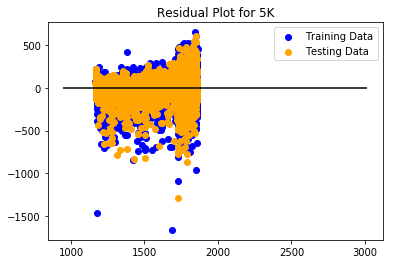

In [148]:
plt.scatter(model.predict(X_train_5K), model.predict(X_train_5K) - y_train_5K, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_5K), model.predict(X_test_5K) - y_test_5K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_5K.min(), xmax=y_test_5K.max())
plt.title("Residual Plot for 5K")
plt.show()

### Calculate MSE and $R^2$ for the model

In [170]:
# Used X_test_5K, y_test_5K, and model.predict(X_test_5K) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_5K, predictions)
r2 = model.score(X_test_5K, y_test_5K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 173650.2187460721, R2: 0.7359632009546694


In [171]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_5K, 'model_5K.pk1')

['model_5K.pk1']

In [ ]:
# # To save the model without the training data, in order to make predictions without re-training the model
# # Source: https://www.geeksforgeeks.org/saving-a-machine-learning-model/

# import pickle
# from sklearn.externals import joblib 
  
# # Save the model as a pickle in a file 
# joblib.dump(model_5K, 'model_5K.pkl') 
  
# # Load the model from the file 
# model_5K_from_joblib = joblib.load('model_5K.pkl')  
  
# # Use the loaded model to make predictions 
# model_5K_from_joblib.predict(X_test_5K) 

### LASSO model

performs feature selection by reducing small coefficient values to absolute zero

In [153]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_5K, y_train_5K)

predictions = lasso.predict(X_test_5K)

MSE = mean_squared_error(y_test_5K, predictions)
r2 = lasso.score(X_test_5K, y_test_5K)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 14624.734715712539, R2: 0.7359646302882223


### Ridge model

reduces multicollinearity
create plot to show differences in coefficient values
use code from here: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [156]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge_5K = Ridge(alpha=.01).fit(X_train_5K, y_train_5K)

predictions_5K = ridge_5K.predict(X_test_5K)

MSE = mean_squared_error(y_test_5K, predictions)
r2 = ridge_5K.score(X_test_5K, y_test_5K)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 14624.813882118813, R2: 0.7359632010157087


### ElasticNet model

In [157]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet_5K = ElasticNet(alpha=.01).fit(X_train_5K, y_train_5K)

predictions_5K = elasticnet_5K.predict(X_test_5K)

MSE = mean_squared_error(y_test_5K, predictions)
r2 = elasticnet_5K.score(X_test_5K, y_test_5K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 14624.813882118813, R2: 0.7359644998768371


(26481, 4) (26481, 1)


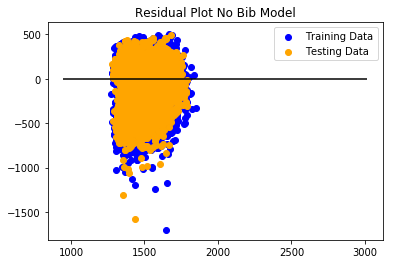

In [158]:
# Re-run the model without the Bib numbers as a feature to test if Bib numbers are helpful

### set up data for modeling
X_nobib = boston2016_clean[['Age','Official Time Duration', 'F', 'M']]
y_nobib = boston2016_clean['5K Duration'].values.reshape(-1, 1)
print(X_nobib.shape, y_nobib.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_nobib, X_test_nobib, y_train_nobib, y_test_nobib = train_test_split(X_nobib, y_nobib, random_state=29)
# X_train_nobib.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_nobib = LinearRegression()
model_nobib.fit(X_train_nobib, y_train_nobib)

# Make predictions

predictions_nobib = model_nobib.predict(X_test_nobib)

# Plot the residuals

plt.scatter(model_nobib.predict(X_train_nobib), model_nobib.predict(X_train_nobib) - y_train_nobib, c="blue", label="Training Data")
plt.scatter(model_nobib.predict(X_test_nobib), model_nobib.predict(X_test_nobib) - y_test_nobib, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_nobib.min(), xmax=y_test_nobib.max())
plt.title("Residual Plot No Bib Model")
plt.show()


In [159]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_nobib, predictions)
r2 = model_nobib.score(X_test_nobib, y_test_nobib)


print(f"MSE: {MSE}, R2: {r2}")

# Model built without Bib numbers has a smaller R2 value

MSE: 14624.813882118813, R2: 0.16612181734262532


(26481, 6) (26481, 1)


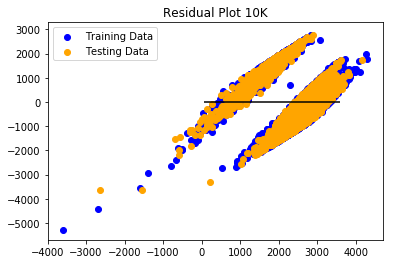

In [163]:
# Re-run the model with the Bib numbers as a feature and for the 5K split times to predict 10K time

### set up data for modeling
X_10K = boston2016_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', '5K Duration']]
y_10K = boston2016_clean['10K Duration'].values.reshape(-1, 1)
print(X_10K.shape, y_10K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_10K, X_test_10K, y_train_10K, y_test_10K = train_test_split(X_10K, y_10K, random_state=29)
# X_train_5K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_10K = LinearRegression()
model_10K.fit(X_train_10K, y_train_10K)

# Make predictions

predictions = model_10K.predict(X_test_10K)

# Plot the residuals

plt.scatter(model_10K.predict(X_train_10K), model_10K.predict(X_train_10K) - y_train_10K, c="blue", label="Training Data")
plt.scatter(model_10K.predict(X_test_10K), model_10K.predict(X_test_10K) - y_test_10K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_10K.min(), xmax=y_test_10K.max())
plt.title("Residual Plot 10K")
plt.show()

In [162]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model_10K.score(X_test_10K, y_test_10K)


print(f"MSE: {MSE}, R2: {r2}")

# Model built without Bib numbers has a smaller R2 value

MSE: 554457.604242487, R2: 0.34084004792845013


In [172]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_10K, 'model_10K.pk1')

['model_10K.pk1']

(26481, 7) (26481, 1)


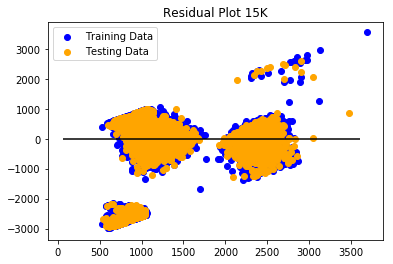

In [168]:
# Re-run the model with the Bib numbers as a feature and for the 5K and 10K split times to predict 15K time

### set up data for modeling
X_15K = boston2016_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', '5K Duration', '10K Duration']]
y_15K = boston2016_clean['15K Duration'].values.reshape(-1, 1)
print(X_15K.shape, y_15K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_15K, X_test_15K, y_train_15K, y_test_15K = train_test_split(X_15K, y_15K, random_state=29)
# X_train_15K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_15K = LinearRegression()
model_15K.fit(X_train_15K, y_train_15K)

# Make predictions

predictions_15K = model_15K.predict(X_test_15K)

# Plot the residuals

plt.scatter(model_15K.predict(X_train_15K), model_15K.predict(X_train_15K) - y_train_15K, c="blue", label="Training Data")
plt.scatter(model_15K.predict(X_test_15K), model_15K.predict(X_test_15K) - y_test_15K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_15K.min(), xmax=y_test_15K.max())
plt.title("Residual Plot 15K")
plt.show()

In [169]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_15K, predictions_15K)
r2 = model_15K.score(X_test_15K, y_test_15K)


print(f"MSE: {MSE}, R2: {r2}")

# Model built without Bib numbers has a smaller R2 value

MSE: 476523.05169585306, R2: 0.32922107382887955


In [173]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_15K, 'model_15K.pk1')

['model_15K.pk1']

(26481, 8) (26481, 1)


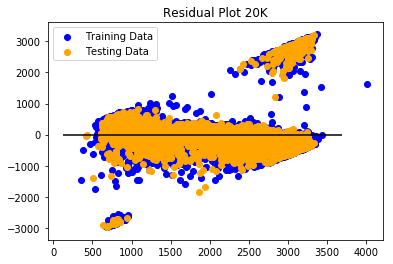

In [175]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K and 15K split times to predict 20K time

### set up data for modeling
X_20K = boston2016_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', '5K Duration', '10K Duration', '15K Duration']]
y_20K = boston2016_clean['20K Duration'].values.reshape(-1, 1)
print(X_20K.shape, y_20K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_20K, X_test_20K, y_train_20K, y_test_20K = train_test_split(X_20K, y_20K, random_state=29)
# X_train_20K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_20K = LinearRegression()
model_20K.fit(X_train_20K, y_train_20K)

# Make predictions

predictions_20K = model_20K.predict(X_test_20K)

# Plot the residuals

plt.scatter(model_20K.predict(X_train_20K), model_20K.predict(X_train_20K) - y_train_20K, c="blue", label="Training Data")
plt.scatter(model_20K.predict(X_test_20K), model_20K.predict(X_test_20K) - y_test_20K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_20K.min(), xmax=y_test_20K.max())
plt.title("Residual Plot 20K")
plt.show()

In [176]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_15K, predictions_15K)
r2 = model_20K.score(X_test_20K, y_test_20K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 476523.05169585306, R2: 0.6025674827828014


In [177]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_20K, 'model_20K.pk1')

['model_20K.pk1']

(26481, 8) (26481, 1)


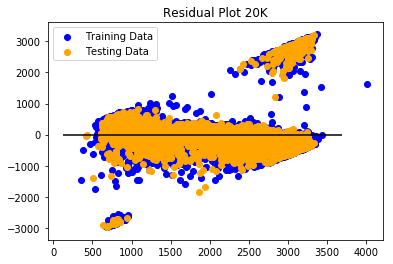

In [175]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K and 15K split times to predict 20K time

### set up data for modeling
X_20K = boston2016_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', '5K Duration', '10K Duration', '15K Duration']]
y_20K = boston2016_clean['20K Duration'].values.reshape(-1, 1)
print(X_20K.shape, y_20K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_20K, X_test_20K, y_train_20K, y_test_20K = train_test_split(X_20K, y_20K, random_state=29)
# X_train_20K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_20K = LinearRegression()
model_20K.fit(X_train_20K, y_train_20K)

# Make predictions

predictions_20K = model_20K.predict(X_test_20K)

# Plot the residuals

plt.scatter(model_20K.predict(X_train_20K), model_20K.predict(X_train_20K) - y_train_20K, c="blue", label="Training Data")
plt.scatter(model_20K.predict(X_test_20K), model_20K.predict(X_test_20K) - y_test_20K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_20K.min(), xmax=y_test_20K.max())
plt.title("Residual Plot 20K")
plt.show()

In [176]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_15K, predictions_15K)
r2 = model_20K.score(X_test_20K, y_test_20K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 476523.05169585306, R2: 0.6025674827828014


In [177]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_20K, 'model_20K.pk1')

['model_20K.pk1']